# Author
## Muhammad Murtaza

# Task #1 Linear Regression Task To Predict the Percentage of Student

## Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Reading Data From Link

In [2]:
dataset_url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
dataset = pd.read_csv(dataset_url)
dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Let's Plot a Graph to see relationship between the attributes.

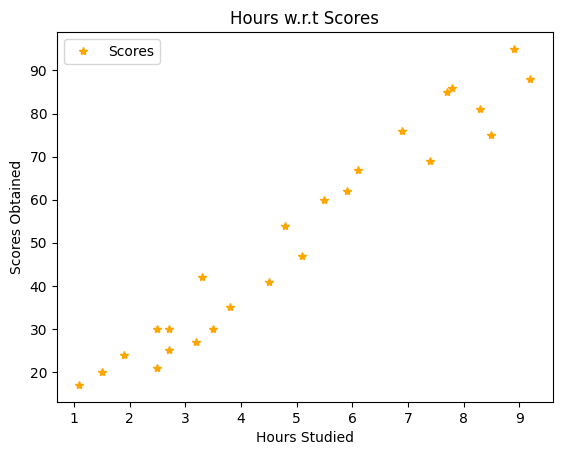

In [3]:
dataset.plot(x="Hours", y="Scores", style="*", color="orange")
plt.title("Hours w.r.t Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Scores Obtained")
plt.show()

## From the above graph we can clearly see a positive linear relation between attributes.

# Data Analysis

In [4]:
dataset.shape

(25, 2)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [6]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Now we will prepare Data for Training

In [8]:
x = dataset.iloc[:, :-1].values

In [9]:
y = dataset.iloc[:, 1].values 

## Now we will split it up for Training and Testing

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

# Calculating Line

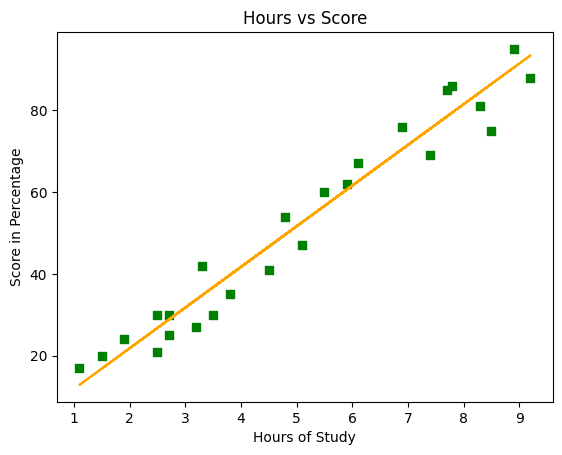

In [12]:
line = model.coef_*x+model.intercept_

# Plotting for the test data
plt.scatter(x, y, marker=",", color="green")
plt.plot(x, line, color="orange");
plt.title("Hours vs Score")
plt.xlabel("Hours of Study")
plt.ylabel("Score in Percentage")
plt.show()

In [13]:
y_pred = model.predict(x_test)
prediction = pd.DataFrame({'Hours': [i[0] for i in x_test], 'Predicted Marks': [k for k in y_pred]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


## Comparing Actual and Predicted Values

In [14]:
compared_score = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks': y_pred})
compared_score

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


## Predicted Score for Student who studies 9.25 hrs/day

In [15]:
hours = 9.25
pred_value = model.predict(np.array([[hours]]))
print("Predicted Score for ", hours ,"is" , pred_value)

Predicted Score for  9.25 is [93.89272889]


# Performance Evaluation of Model

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error is: ", mse)
print("Mean Absolute Error is: ", mae)
print("r2 Score is: ", r2)

Mean Squared Error is:  20.33292367497997
Mean Absolute Error is:  4.130879918502486
r2 Score is:  0.9367661043365055
